<div class="alert alert-block alert-info">
<center>ESTATÍSTICA APLICADA</center>
<center>ATIVIDADE COM DADOS DA POLÍCIA RODOVIÁRIA FEDERAL</center>
<center>ALUNA:HEVELYNE DE MELO MENEZES</center>
</div>

1º) TAREFA

Carregue em dataframes os conjuntos de dados referentes ao ano de 2021, acessando os arquivos compactados diretamente do site, sem precisar baixá-los. Corrija quaisquer erros que apareçam no carregamento dos arquivos.

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt

Dados_PRF_2021 = pd.read_csv('acidentes2021_todas_causas_tipos.csv', sep=';', encoding="latin")
Dados_PRF_2021.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,331693.0,739775.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Sim,...,Masculino,1,0,0,0,"-28,43029392","-48,84925073",SPRF-SC,DEL02-SC,UOP01-DEL02-SC
1,331693.0,739774.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Sim,...,Feminino,0,1,0,0,"-28,43029392","-48,84925073",SPRF-SC,DEL02-SC,UOP01-DEL02-SC
2,331693.0,738219.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Sim,...,Masculino,1,0,0,0,"-28,43029392","-48,84925073",SPRF-SC,DEL02-SC,UOP01-DEL02-SC
3,331693.0,739775.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Sim,...,Masculino,1,0,0,0,"-28,43029392","-48,84925073",SPRF-SC,DEL02-SC,UOP01-DEL02-SC
4,331693.0,739774.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Sim,...,Feminino,0,1,0,0,"-28,43029392","-48,84925073",SPRF-SC,DEL02-SC,UOP01-DEL02-SC


2º) TAREFA

Explore os conjuntos de dados, respondendo as questões:

(a) quantos acidentes ocorreram em cada ano?

(b) quantas variáveis cada conjunto de dados registra?

(c) quais as cinco cidades brasileiras onde mais ocorreram acidentes em rodovias federais?

(d) quantos acidentes com feridos graves aconteceram na Paraíba em 2021?

In [10]:
#  A) Para fazer a contagem de quantos acidentes ocorreram em cada ano, utilizei a chamada da função "len" para o index de de cada filtragem de data realizada no DataFrame principal. 

numero_acidentes = len(Dados_PRF_2021.axes[0]) #captar o número de linhas para registro de quantos acidentes houveram
print("Números de acidentes em 2021:", numero_acidentes)


Números de acidentes em 2021: 449018


In [ ]:
# B) Quantas variáveis cada conjunto de dados registra? 

In [11]:
acidentes = pd.read_csv('acidentes2021_todas_causas_tipos.csv', sep=';', encoding="latin")

In [12]:
# Para saber a quantidade de variáveis contidas em cada coluna do DataFrame 
# gerei uma lista com o título de todas as colunas, a partir disso, utilizei o for como estrutura de repetição 
# para contar de forma mais "automática" cada coluna, utilizei a função "unique", 
# juntamente ao método len da lista gerada pela função "unique". 

colunas = acidentes.columns
for i in colunas:
  count = len(acidentes[i].unique())
  print(f'Foram registradas {count} variáveis na coluna "{i}"')

Foram registradas 64539 variáveis na coluna "id"
Foram registradas 150925 variáveis na coluna "pesid"
Foram registradas 365 variáveis na coluna "data_inversa"
Foram registradas 7 variáveis na coluna "dia_semana"
Foram registradas 1302 variáveis na coluna "horario"
Foram registradas 27 variáveis na coluna "uf"
Foram registradas 114 variáveis na coluna "br"
Foram registradas 7723 variáveis na coluna "km"
Foram registradas 1791 variáveis na coluna "municipio"
Foram registradas 2 variáveis na coluna "causa_principal"
Foram registradas 72 variáveis na coluna "causa_acidente"
Foram registradas 15 variáveis na coluna "ordem_tipo_acidente"
Foram registradas 17 variáveis na coluna "tipo_acidente"
Foram registradas 3 variáveis na coluna "classificacao_acidente"
Foram registradas 4 variáveis na coluna "fase_dia"
Foram registradas 3 variáveis na coluna "sentido_via"
Foram registradas 10 variáveis na coluna "condicao_metereologica"
Foram registradas 3 variáveis na coluna "tipo_pista"
Foram registra

In [ ]:
# C) Quais as cinco cidades brasileiras onde mais ocorreram acidentes em rodovias federais?

# Para responder a questão seria necessária uma filtragem contando todos os acidentes que ocorreram
# em cada municipio, para isso utilizei as funções "groupby" e "agg".

In [13]:
acid_munic = acidentes.groupby('municipio').agg(numero_acidentes = ('municipio', 'count'))
acid_munic

,numero_acidentes
municipio,
ABADIA DE GOIAS,150
ABADIANIA,377
ABARE,92
ABEL FIGUEIREDO,27
ABRE CAMPO,118
...,...
XAPURI,18
XAXIM,201
XEXEU,65


In [ ]:
# Agora, para rankear os 5 municípios que mais tiveram acidentes, 
# utilizei a função "nlargest" e como parametros o número de itens que quero como retorno e a coluna de filtragem.

<AxesSubplot:xlabel='municipio'>

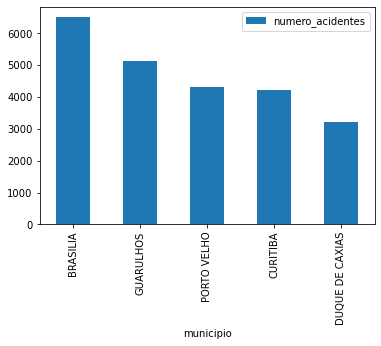

In [14]:
top5 = acid_munic.nlargest(5, "numero_acidentes")
#display(top5)
top5.plot(kind='bar')

In [22]:
# (d) Foi gerada uma filtragem contando quantas linhas correspondem ao estado da Paraíba e que possuem 
# algum número de feridos. Finalizando com um agrupamento da contagem das linhas,
# ou seja, de quantos acidentes ocorreram com vítimas feridas gravemente em 2021.

# Correção do formato de data para filtragem.

acidentes['data_inversa'] = acidentes['data_inversa'].str.replace("-", "")
acidentes['data_inversa'] = pd.to_datetime(acidentes['data_inversa'], format='%Y%m%d')
acidentes.rename(columns={'data_inversa':'data'}, inplace=True)

filter_PB = pd.DataFrame(acidentes.loc[(acidentes['data'].dt.to_period('Y')=='2021') & (acidentes['uf'] == 'PB') & (acidentes['feridos_graves'] != 0)])
filter_PB.groupby('uf').agg(n_acid_feridos_graves=('feridos_graves', 'count'))


,n_acid_feridos_graves
uf,
PB,1874


3ª TAREFA

Para cada indicação abaixo, construa um novo dataframe, salvando-o com a terminação .csv.

(a) ranking de acidentes por estado para todos os anos (um só arquivo combinando a informação dos quatro anos);

(b) acidentes por dia da semana para todos os anos (um só arquivo combinando a informação dos quatro anos).

In [ ]:
# A) Para rankear a quantidade de acidentes por estado em todos os anos, realizei uma filtragem usando "groupby" 
# contando os acidentes por estado sem restrição de ano. Em seguida, transformando-o em um novo DataFrame,
# adicionei a coluna "ranking" ao mesmo, utilizando o método "rank" e convertendo todo o resultado para inteiro. 
# Por fim, filtrei os valores em ordem crescente

In [23]:
acid_total = acidentes.groupby(['uf']).agg(numero_acidentes=('uf','count'))
rank_acidentes = pd.DataFrame(acid_total)
rank_acidentes['ranking'] = pd.DataFrame(rank_acidentes['numero_acidentes'].rank(method='max', ascending=False)).astype(int)
rank_acidentes.sort_values(['ranking'], inplace=True)
rank_acidentes.to_csv('ranking_acidentes.csv', encoding='latin1', sep=';')
rank_acidentes

,numero_acidentes,ranking
uf,,
MG,60684,1
PR,42176,2
SC,37913,3
SP,33570,4
RS,29710,5
GO,27880,6
BA,26333,7
RJ,25184,8
MS,17644,9


In [24]:
# B) (b) Para essa questão, utilizei do mesmo método que anteriormente, contando quantas vezes cada dia da semana
# se repete no DataFrame principal, transformando, em seguida, em um DataFrame.

acid_total_dias = acidentes.groupby(['dia_semana']).agg(n_acidentes=('dia_semana','count'))
acid_dias = pd.DataFrame(acid_total_dias)
acid_dias.to_csv('qtd_acidentes_por_dia.csv', encoding='latin1', sep=';')
acid_dias

,n_acidentes
dia_semana,
domingo,79924
quarta-feira,57226
quinta-feira,56518
segunda-feira,58259
sexta-feira,71233
sábado,73590
terça-feira,52268


4º TAREFA

Com relação a ocorrência dos acidentes, responda:

(a) qual a causa mais frequente e a mais rara de acidentes registrados nos quatro anos?

(b) qual a proporção de pessoas ilesas e de feridos graves por mês em cada um dos anos considerados? (proporção = numero de ilesos ou feridos graves/ número total de pessoas envolvidas no acidente);

(c) mostre, reorganizando o conjunto de dados, se a pandemia conseguiu diminuir ou não a incidência de acidentes nas rodovias federais.


In [26]:
# A) Para essa questão, gerei uma filtragem simples contando a quantidade de cada ocorrência, atribui os resultados
# a duas variáveis e exibi ambos com a função "display".

causa = acidentes.groupby('causa_acidente').agg(numero_ocorrencias=('causa_acidente', 'count'))
causa_acid = pd.DataFrame(causa)
causa_acid.reset_index(level='causa_acidente', inplace=True)
max = causa_acid[causa_acid['numero_ocorrencias'] == causa_acid['numero_ocorrencias'].max()]
min = causa_acid[causa_acid['numero_ocorrencias'] == causa_acid['numero_ocorrencias'].min()]
display(max)
display(min)

,causa_acidente,numero_ocorrencias
70,Velocidade Incompatível,55869


,causa_acidente,numero_ocorrencias
16,Condutor não acionou o farol baixo durante o d...,34


In [ ]:
# B) Qual a proporção de pessoas ilesas e de feridos graves por mês? 
# (proporção = numero de ilesos ou feridos graves/ número total de pessoas envolvidas no acidente)



# Foram reeunidos os dados de número de ilesos, feridos e pessoas envolvidas no acidente dentro de um só 
# DataFrame. Adicionei as respectivas colunas de proporção para ilesos e feridos utilizando dos dados coletados 
# anteriormente. Por fim, foi formatado resultado das colunas, já que estavam em float, para porcentagem. 



proporcao = acidentes.groupby(acidentes['data_inversa'].dt.to_period('M')).agg(n_acidentes=('id', 'count'),n_ilesos=('ilesos', 'sum'),n_feridos_graves=('feridos_graves', 'sum'), n_pessoas=('pessoas', 'sum'))
proporcao['prop_ilesos'] = proporcao['n_ilesos']/proporcao['n_pessoas']

proporcao['prop_feridos_graves'] = proporcao['n_feridos_graves']/proporcao['n_pessoas']
prop = pd.DataFrame(proporcao)
#exibindo apenas os 10 primeios itens para melhor visualização
(prop.loc[:,['n_pessoas','prop_ilesos', 'prop_feridos_graves']].head(10)).style.format({'prop_ilesos':'{:,.2%}'.format, 'prop_feridos_graves':'{:,.2%}'.format})
